In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def extract_layer_output(model, layer_name, data):
    int_layer_op = model.get_layer(name=layer_name).output
    int_layer_model = Model(inputs=model.input, outputs=int_layer_op)
    int_layer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return int_layer_model.predict(data)

In [3]:
def generate_df(arr, label):
    df = pd.DataFrame(arr)
    df['label'] = label
    return df

### Loading the Dataset

In [4]:
base_path = 'real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False,
    class_mode='binary'
)

test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='binary'
)

Found 60000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


In [5]:
y_test = test_flow.classes

In [6]:
## update train flow and test flow to use grayscale color mode
gs_train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    color_mode='grayscale',
    class_mode='binary'
)

gs_test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    color_mode='grayscale',
    shuffle = False,
    class_mode='binary'
)

gs_ytest = gs_test_flow.classes

Found 60000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


### DenseNet Model Trained on GrayScale Images

In [7]:
densenet_v3 = load_model('grey_densenet.h5')

#### Extract Intermediate Layer to get vector representation of the images

In [8]:
int_output_dv3 = extract_layer_output(densenet_v3, 'global_average_pooling2d', gs_train_flow)
int_output_dv3.shape

938/938 [==============================] - 3382s 4s/step


(60000, 1024)

In [9]:
int_output_dv3 = generate_df(int_output_dv3, gs_train_flow.classes)
int_output_dv3.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.252021,0.204682,0.267328,0.056696,0.239364,0.184388,0.096532,0.184930,0.131451,0.418885,...,0.000000,0.111337,0.049446,0.071807,0.001609,0.009441,0.089467,0.044058,0.203860,0
1,0.296173,0.121617,0.260976,0.256229,0.288297,0.135929,0.089477,0.146609,0.144459,0.202970,...,0.000000,0.003590,0.020785,0.000000,0.000000,0.003977,0.000000,0.007353,0.173209,0
2,0.257362,0.382693,0.285236,0.166314,0.223520,0.181554,0.138381,0.238263,0.128627,0.392574,...,0.004318,0.192983,0.028295,0.200740,0.000794,0.003771,0.201449,0.191125,0.119748,0
3,0.399818,0.308993,0.323503,0.510905,0.348319,0.195331,0.187403,0.279174,0.175025,0.247285,...,0.002752,0.023576,0.089049,0.036427,0.003843,0.029385,0.024965,0.072875,0.389528,0
4,0.194421,0.424913,0.249233,0.268717,0.199482,0.226459,0.103236,0.199476,0.137896,0.445581,...,0.001806,0.424518,0.038503,0.407360,0.000000,0.007616,0.419439,0.366795,0.009805,0


In [10]:
int_output_dv3.tail()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
59995,0.005461,0.366521,0.256456,0.459572,0.003027,0.201093,0.124978,0.231681,0.214907,0.266551,...,0.058808,1.328000,0.129120,1.376608,0.007772,0.030916,1.344236,1.332743,0.009502,1
59996,0.048956,0.233033,0.401760,0.696990,0.046319,0.143181,0.099451,0.177301,0.194124,0.226115,...,0.000000,0.270041,0.003839,0.257505,0.000000,0.000000,0.252002,0.299104,0.000000,1
59997,0.146476,0.250416,0.352661,0.323823,0.121858,0.112074,0.102432,0.212804,0.149124,0.252499,...,0.001364,0.201296,0.012653,0.203172,0.000000,0.001109,0.203012,0.174697,0.000000,1
59998,0.345417,0.034922,0.482006,0.237512,0.294589,0.100300,0.085177,0.096395,0.232837,0.114530,...,0.000013,0.000000,0.056678,0.000000,0.000000,0.011187,0.000000,0.001413,0.374242,1
59999,0.023143,0.470772,0.313663,0.502004,0.020217,0.130905,0.137238,0.295729,0.214667,0.250364,...,0.061095,1.325829,0.169494,1.379555,0.006624,0.056504,1.340195,1.343282,0.039779,1


In [11]:
int_output_dv3.to_csv('gery_densenet_rep.csv', index=False)

### Predictions

In [12]:
y_pred_dv3 = densenet_v3.predict(gs_test_flow)

12000/12000 [==============================] - 1194s 99ms/step


### Evaluation Report

In [13]:
print("ROC AUC Score:", metrics.roc_auc_score(gs_ytest, y_pred_dv3))
print("AP Score:", metrics.average_precision_score(gs_ytest, y_pred_dv3))
print()
print(metrics.classification_report(gs_ytest, y_pred_dv3 > 0.5))

ROC AUC Score: 0.9833113194444444
AP Score: 0.9821520912891872

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6000
           1       0.93      0.95      0.94      6000

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



### DenseNet Model 

In [14]:
densenet_v1 = load_model('denseNet_model.h5')

#### Extract Intermediate Layer to get vector representation of the images

In [15]:
int_output_dv1 = extract_layer_output(densenet_v1, 'global_average_pooling2d', train_flow)
int_output_dv1.shape

938/938 [==============================] - 3223s 3s/step


(60000, 1024)

In [16]:
int_output_dv1 = generate_df(int_output_dv1, train_flow.classes)
int_output_dv1.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.247184,0.156961,0.143793,0.132179,0.191950,0.530638,0.032250,0.277092,0.275295,0.296485,...,0.622439,0.013996,0.714794,0.501137,0.642204,0.113024,0.015427,0.008663,0.556615,0
1,0.169659,0.152344,0.157367,0.063578,0.158936,0.296702,0.023955,0.159277,0.227932,0.177019,...,0.227097,0.004605,0.278615,0.353038,0.247399,0.139087,0.001929,0.001517,0.190571,0
2,0.048215,0.245627,0.225056,0.118945,0.185985,0.063453,0.041043,0.167086,0.350523,0.350896,...,0.856468,0.033317,1.005297,0.000000,0.887778,0.027982,0.021423,0.014613,0.775589,0
3,0.060335,0.200556,0.176066,0.047775,0.203520,0.172542,0.013014,0.220664,0.456706,0.035538,...,0.000000,0.000158,0.016500,0.004234,0.001043,0.279498,0.000000,0.000169,0.000000,0
4,0.210073,0.083397,0.105579,0.081817,0.158027,0.612202,0.017667,0.237914,0.344441,0.063525,...,0.022345,0.000000,0.058239,0.416362,0.032158,0.213046,0.000000,0.000381,0.008518,0


In [17]:
int_output_dv1.to_csv('RGB_DenseNet_rep.csv', index=False)

### Predictions

In [18]:
y_pred_dv1 = densenet_v1.predict(test_flow)

12000/12000 [==============================] - 1255s 104ms/step


### Evaluation Report

In [19]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred_dv1))
print("AP Score:", metrics.average_precision_score(y_test, y_pred_dv1))
print()
print(metrics.classification_report(y_test, y_pred_dv1 > 0.5))

ROC AUC Score: 0.9670040416666665
AP Score: 0.9651211068699082

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      6000
           1       0.89      0.92      0.91      6000

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



### Comparison

In [20]:
dv1_fpr, dv1_tpr, _ = metrics.roc_curve(y_test, y_pred_dv1)
dv1_roc_auc = metrics.auc(dv1_fpr, dv1_tpr)

dv3_fpr, dv3_tpr, _ = metrics.roc_curve(gs_ytest, y_pred_dv3)
dv3_roc_auc = metrics.auc(dv3_fpr, dv3_tpr)

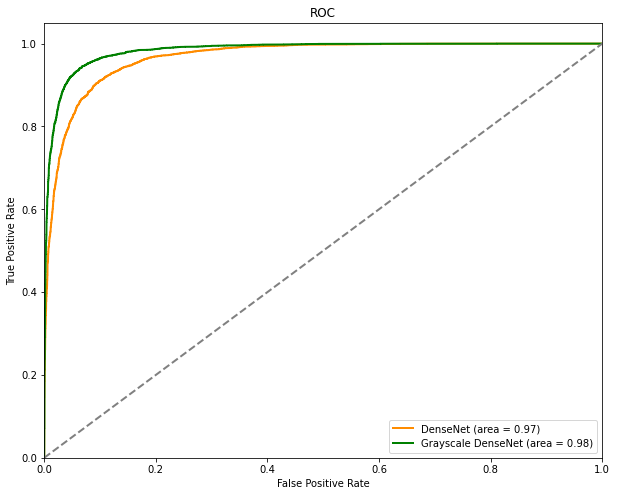

In [21]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(dv1_fpr, dv1_tpr, color='darkorange', lw=lw, label='DenseNet (area = %0.2f)' % dv1_roc_auc)
plt.plot(dv3_fpr, dv3_tpr, color='green', lw=lw, label='Grayscale DenseNet (area = %0.2f)' % dv3_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()